# Bhubaneswar Surface Temperature Forecasting
**TTL project**

In [76]:
#importing libraries 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [75]:
#reading weather data for Bhubabneswar

In [3]:
df=pd.read_csv('data.csv')
df

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1990-01-01,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-01-03,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-01-04,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-01-05,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11930,2022-08-31,29.2,26.3,33.0,9.0,NaN,186.0,8.2,NaN,1006.6,NaN
11931,2022-09-01,29.6,27.0,33.0,2.1,NaN,190.0,9.5,NaN,1006.8,NaN
11932,2022-09-02,29.7,26.3,33.0,3.3,NaN,198.0,9.5,NaN,1007.3,NaN
11933,2022-09-03,29.2,26.1,34.0,9.7,NaN,215.0,8.5,NaN,1005.5,NaN


**Cleaning the data**

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11935 non-null  object 
 1   tavg    11857 non-null  float64
 2   tmin    9845 non-null   float64
 3   tmax    11044 non-null  float64
 4   prcp    6838 non-null   float64
 5   snow    0 non-null      float64
 6   wdir    1294 non-null   float64
 7   wspd    2129 non-null   float64
 8   wpgt    0 non-null      float64
 9   pres    1243 non-null   float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 1.0+ MB


In [5]:
data=df.copy()

In [6]:
data['Date'] = pd.to_datetime(data['time'])

In [7]:
data.set_index(data['Date'], inplace = True)
data.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-03', '2022-09-04'],
              dtype='datetime64[ns]', name='Date', length=11935, freq=None)

In [8]:
data

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,Date
Date,,,,,,,,,,,,
1990-01-01,1990-01-01,20.1,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-01
1990-01-02,1990-01-02,20.7,16.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-02
1990-01-03,1990-01-03,20.7,16.0,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-03
1990-01-04,1990-01-04,18.8,NaN,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-04
1990-01-05,1990-01-05,19.8,11.0,28.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1990-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,2022-08-31,29.2,26.3,33.0,9.0,NaN,186.0,8.2,NaN,1006.6,NaN,2022-08-31
2022-09-01,2022-09-01,29.6,27.0,33.0,2.1,NaN,190.0,9.5,NaN,1006.8,NaN,2022-09-01
2022-09-02,2022-09-02,29.7,26.3,33.0,3.3,NaN,198.0,9.5,NaN,1007.3,NaN,2022-09-02


In [9]:
df.columns

Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')

In [10]:
cols=['time', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt','pres', 'tsun']
data.drop(cols, axis = 1, inplace = True)
data.head()

,tavg,Date
Date,,
1990-01-01,20.1,1990-01-01
1990-01-02,20.7,1990-01-02
1990-01-03,20.7,1990-01-03
1990-01-04,18.8,1990-01-04
1990-01-05,19.8,1990-01-05


In [11]:
data=data.drop(['Date'], axis=1)


In [12]:
data['AverageTemperature'] = data['tavg']

In [13]:
data.head()

,tavg,AverageTemperature
Date,,
1990-01-01,20.1,20.1
1990-01-02,20.7,20.7
1990-01-03,20.7,20.7
1990-01-04,18.8,18.8
1990-01-05,19.8,19.8


In [14]:
data=data.drop(['tavg'], axis=1)

In [15]:
data.head()

,AverageTemperature
Date,
1990-01-01,20.1
1990-01-02,20.7
1990-01-03,20.7
1990-01-04,18.8
1990-01-05,19.8


In [16]:
data

,AverageTemperature
Date,
1990-01-01,20.1
1990-01-02,20.7
1990-01-03,20.7
1990-01-04,18.8
1990-01-05,19.8
...,...
2022-08-31,29.2
2022-09-01,29.6
2022-09-02,29.7


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

**FINDING FOR OUTLIER**


In [18]:

# Calculate z-scores
data['z_score'] = (data['AverageTemperature'] - data['AverageTemperature'].mean()) / data['AverageTemperature'].std()

# Identify outliers using z-score method
outliers_zscore = data[(np.abs(data['z_score']) > 3)]

# Calculate IQR
Q1 = data['AverageTemperature'].quantile(0.25)
Q3 = data['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = data[(data['AverageTemperature'] < (Q1 - 1.5 * IQR)) | (data['AverageTemperature'] > (Q3 + 1.5 * IQR))]

print("Outliers using z-score method:")
print(outliers_zscore)
print("\nOutliers using IQR method:")
print(outliers_iqr)

Outliers using z-score method:
            AverageTemperature   z_score
Date                                    
1999-01-12                15.7 -3.198342
2004-01-06                16.3 -3.028393
2011-01-06                16.1 -3.085043

Outliers using IQR method:
            AverageTemperature   z_score
Date                                    
1991-01-05                16.7 -2.915093
1992-01-01                16.6 -2.943418
1992-01-02                17.1 -2.801793
1992-01-04                16.8 -2.886768
1992-01-05                17.5 -2.688494
1993-12-24                17.6 -2.660169
1996-12-10                16.5 -2.971743
1996-12-11                17.2 -2.773469
1997-01-23                16.9 -2.858443
1998-01-04                16.8 -2.886768
1998-02-07                17.6 -2.660169
1998-05-30                37.0  2.834867
1998-12-28                17.4 -2.716819
1999-01-12                15.7 -3.198342
2003-01-11                17.1 -2.801793
2003-01-17                17.0 -2.83011

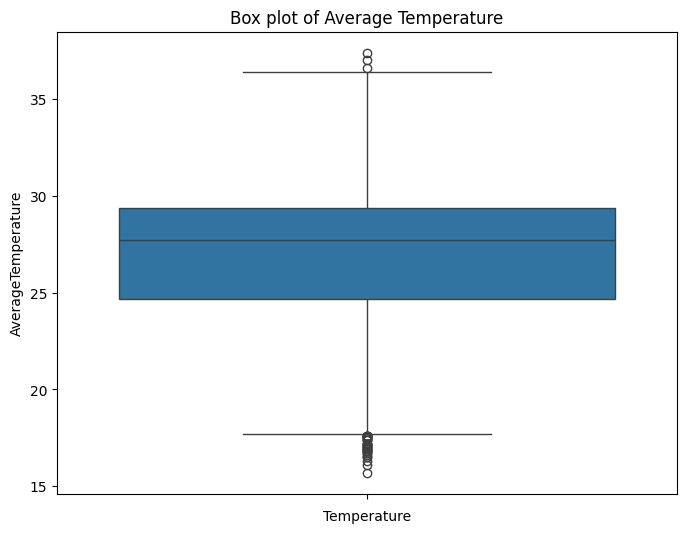

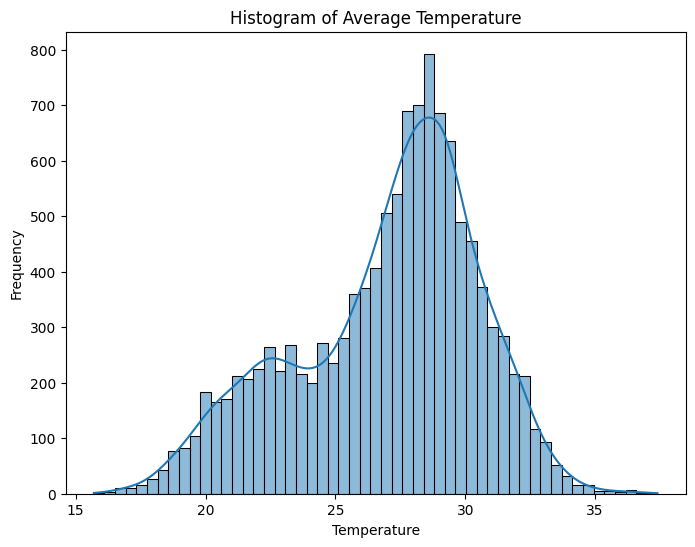

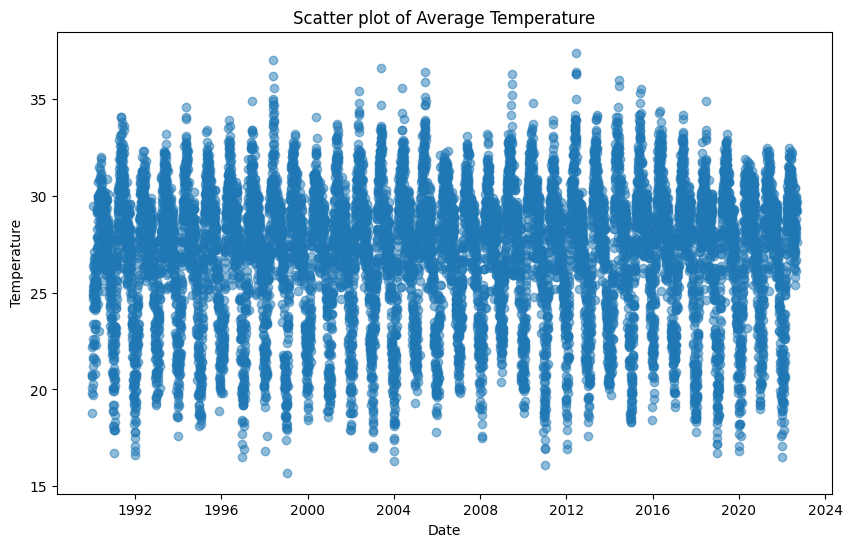

In [19]:

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['AverageTemperature'])
plt.title('Box plot of Average Temperature')
plt.xlabel('Temperature')
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data['AverageTemperature'], kde=True)
plt.title('Histogram of Average Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Scatter plot (with index as x-axis)
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['AverageTemperature'], alpha=0.5)
plt.title('Scatter plot of Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [20]:
Total = data.isnull().sum().sort_values(ascending = False)    

In [140]:
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
AverageTemperature,78,0.65354
z_score,78,0.65354


In [21]:
mean_temp = data['AverageTemperature'].mean()

# Replace missing values with the mean
data['AverageTemperature'] = data['AverageTemperature'].fillna(mean_temp)
data

,AverageTemperature,z_score
Date,,
1990-01-01,20.1,-1.952046
1990-01-02,20.7,-1.782096
1990-01-03,20.7,-1.782096
1990-01-04,18.8,-2.320270
1990-01-05,19.8,-2.037020
...,...,...
2022-08-31,29.2,0.625523
2022-09-01,29.6,0.738823
2022-09-02,29.7,0.767148


In [29]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

# Resample the data to monthly frequency and take the mean temperature for each month
data = data.resample('M').mean()

# Drop any rows with missing values (if any)
data.dropna(inplace=True)

# Display the resulting DataFrame
data


,AverageTemperature,z_score
Date,,
1990-01-31,23.158065,-1.085851
1990-02-28,24.771429,-0.628867
1990-03-31,26.202955,-0.230834
1990-04-30,28.646667,0.468792
1990-05-31,28.630365,0.599558
...,...,...
2022-05-31,30.154839,0.895980
2022-06-30,29.906667,0.825686
2022-07-31,28.264516,0.360548


In [30]:
Total = data.isnull().sum().sort_values(ascending = False)    

In [31]:
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
AverageTemperature,0,0.0
z_score,0,0.0


# **Exploratory Data Analysis:**

**Visualising the Surface Temperature Data:**

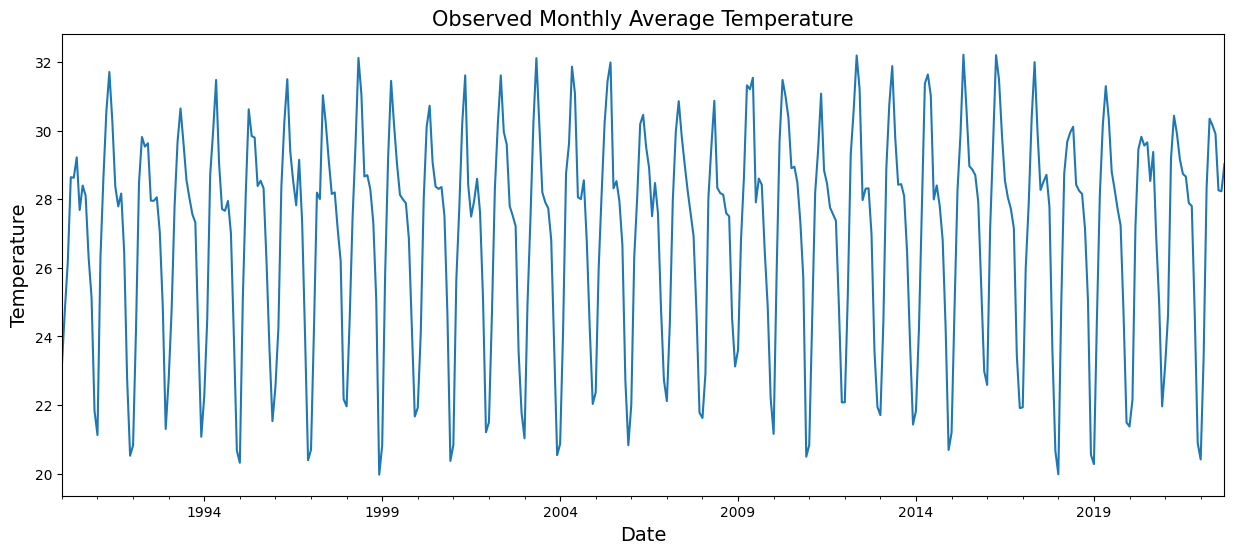

In [32]:
data=data.drop(['z_score'], axis=1)
data.plot(figsize = (15, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Observed Monthly Average Temperature', fontsize = 15)
plt.show()

**Visualising Moving Averages of the Surface Temperatures:**

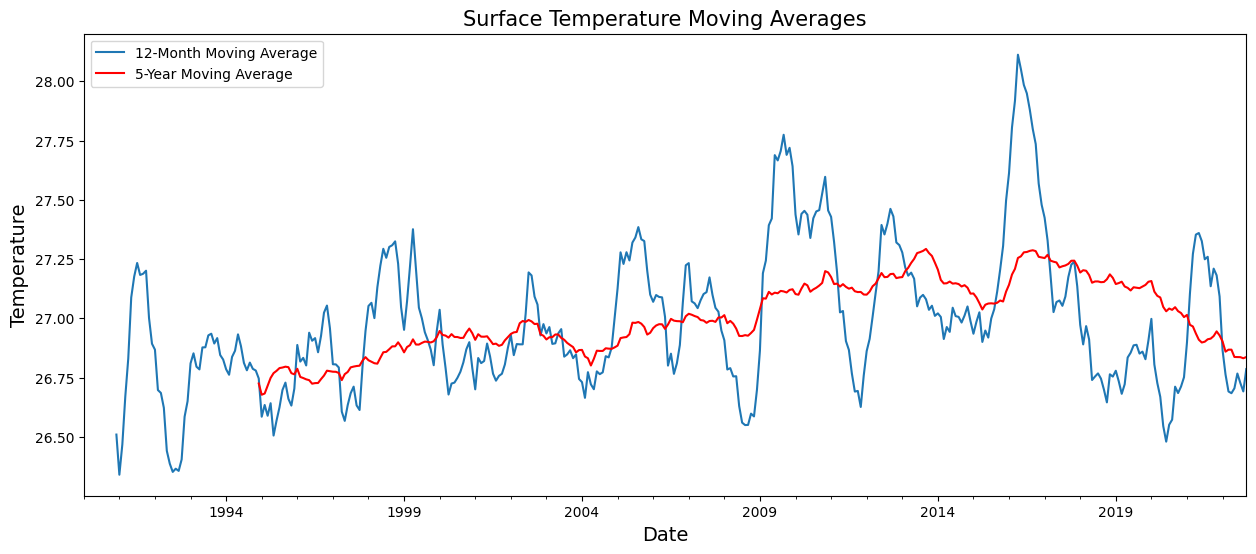

In [33]:
yearly = data['AverageTemperature'].rolling(window = 12).mean()
fiveyearly = data['AverageTemperature'].rolling(window = 60).mean()
MAax = yearly['1975':].plot(figsize = (15, 6), label = '12-Month Moving Average')
fiveyearly['1975':].plot(ax = MAax, color = 'red', label = '5-Year Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Surface Temperature Moving Averages', fontsize = 15)
plt.legend()
plt.show()

In [34]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


**Seasonal Decomposition using Moving Averages:**

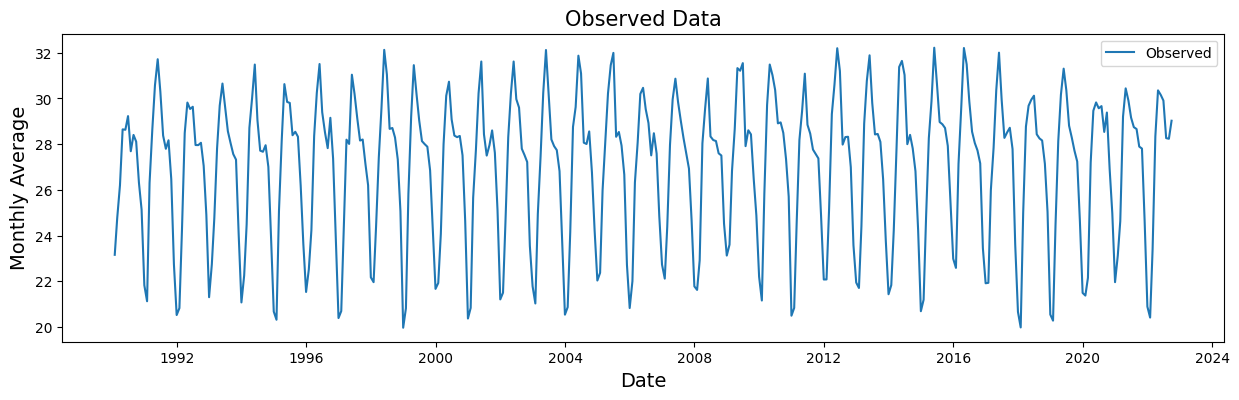

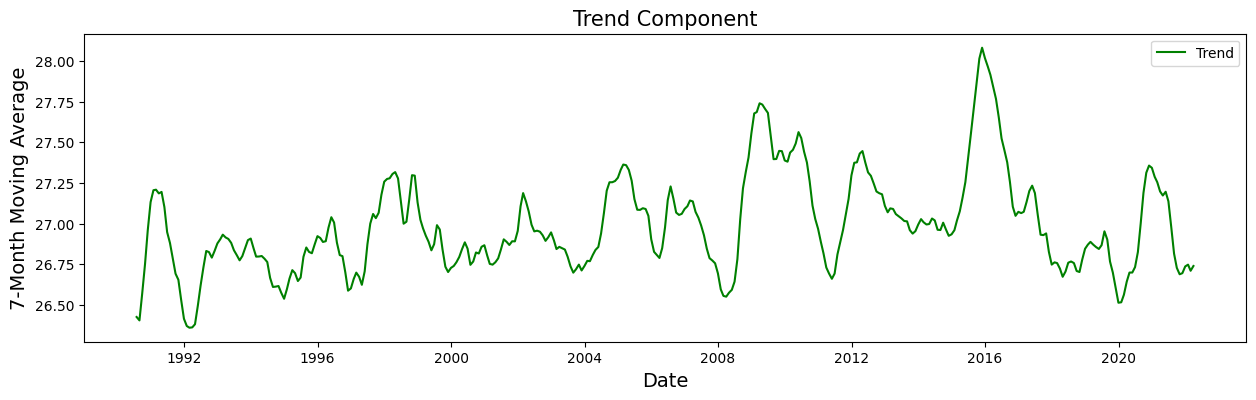

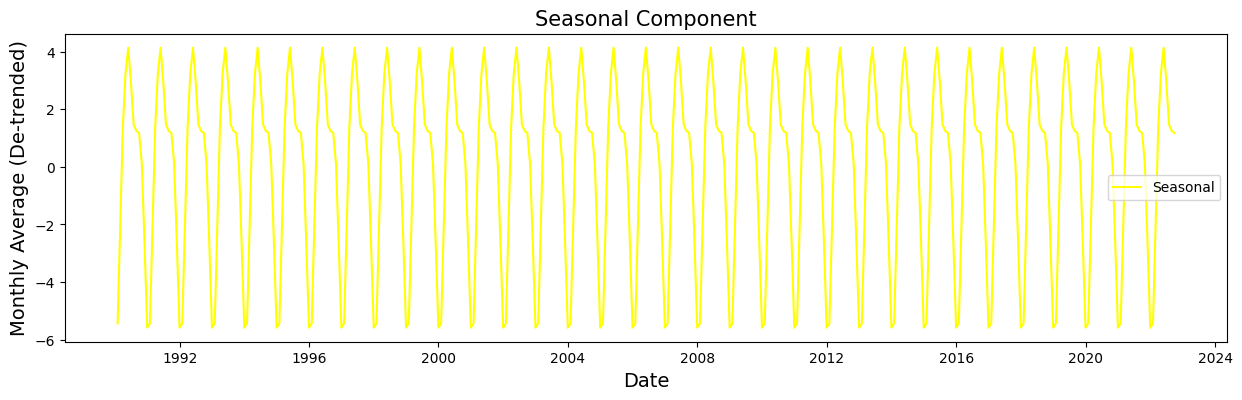

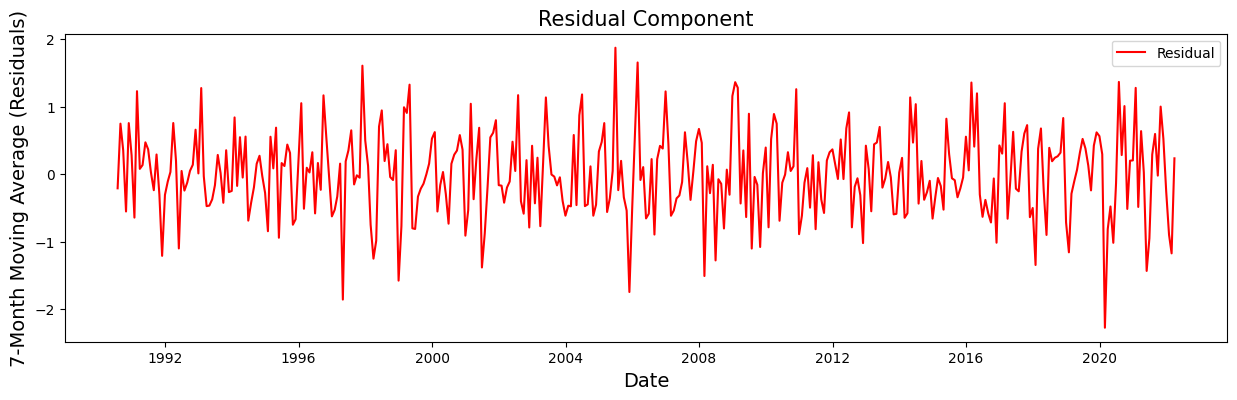

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decomposing the time series:
decomposition = seasonal_decompose(data)

#Plotting the observed values:
observed = decomposition.observed
plt.figure(figsize = (15, 4))
plt.plot(observed, label = 'Observed')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Observed Data", fontsize = 15)
plt.show()

#Plotting the trend component:
trend = decomposition.trend
plt.figure(figsize = (15, 4))
plt.plot(trend, label = 'Trend', color = 'green')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Trend Component", fontsize = 15)
plt.show()

#Plotting the seasonal component:
seasonal = decomposition.seasonal
plt.figure(figsize = (15, 4))
plt.plot(seasonal, label = 'Seasonal', color = 'yellow')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Monthly Average (De-trended)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Seasonal Component", fontsize = 15)
plt.show()

#Plotting the residual component:
residual = decomposition.resid
plt.figure(figsize = (15, 4))
plt.plot(residual, label = 'Residual', color = 'red')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('7-Month Moving Average (Residuals)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Residual Component", fontsize = 15)
plt.show()

**Checking for Stationarity of Data:**

A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. We need to ensure that the time series is stationary before using it to train a model.

**Augmented Dickey-Fuller (ADF) Test:**

In [37]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                  -5.121912
p-value                          0.000013
No. of Lags Used                15.000000
Number of Observations Used    377.000000
Critical Value (1%)             -3.447815
Critical Value (5%)             -2.869237
Critical Value (10%)            -2.570870
dtype: float64


**The p-value is lesser than the level of significance (0.05)** . 
This indicates that our time series data is **stationary.**

**KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test**

In [38]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index = ['Test Statistic','p-value','No. of Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(data)

Results of KPSS Test:
Test Statistic            0.101696
p-value                   0.100000
No. of Lags Used         17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_19492\282998701.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')


The p-value is greater than the level of significance (0.05)
**This indicates that our time series is stationary.**

## Both ADF and KPSS tests are in agreement that the time series data is stationary.

# Pre-processing the Data:

**Assigning Frequency to the Time Series Data:**

In [39]:
y = data['AverageTemperature'].resample('MS').mean()
y.head()

Date
1990-01-01    23.158065
1990-02-01    24.771429
1990-03-01    26.202955
1990-04-01    28.646667
1990-05-01    28.630365
Freq: MS, Name: AverageTemperature, dtype: float64

In [40]:
train = y[:'2015']
test = y['2016':]

In [41]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - -------------------------------------- 30.7/614.7 kB 1.4 MB/s eta 0:00:01
   ------- -------------------------------- 112.6/614.7 kB 1.3 MB/s eta 0:00:01
   -------------- ------------------------- 225.3/614.7 kB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 460.8/614.7 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 30.7 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 13.8 MB/s eta 0:00:01
   ------------------------------- -------- 2.2/2.8 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 14.8 MB/s eta 0:00:0

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


# Building the SARIMAX Model:

**Using Auto-ARIMA to Find Optimal Values of the Hyperparameters:**

In [42]:
from pmdarima.arima import auto_arima

#The default values of several important parameters for auto_arima function are as follows:
#max_p=5, max_d=2, max_q=5, max_P=2, max_D=1, max_Q=2

arima_model = auto_arima(train, seasonal = True, m = 12, stepwise = False, trace = 1, random_state = 10)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1604.882, Time=0.06 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1343.648, Time=0.29 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1200.791, Time=1.08 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=937.575, Time=1.48 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1001.634, Time=3.16 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.77 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.82 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1347.018, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1189.305, Time=0.55 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1097.478, Time=1.24 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=908.182, Time=1.20 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=889.283, Time=1.86 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=933.763, Time=3.81 sec
 ARIMA(0,0,1)(2,0,0

**Training the SARIMAX Model:**


Now we train the SARIMAX model using the optimal values of the hyperparameters that we found using auto-ARIMA.

In [52]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (1, 0, 0), seasonal_order = (1, 0, 1, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)
fitted_model = model.fit(maxiter = 200, method = 'nm')
print(fitted_model.summary())

Optimization terminated successfully.
         Current function value: 1.049347
         Iterations: 167
         Function evaluations: 274
                                      SARIMAX Results                                       
Dep. Variable:                   AverageTemperature   No. Observations:                  312
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -327.396
Date:                              Wed, 27 Mar 2024   AIC                            662.792
Time:                                      18:15:39   BIC                            677.594
Sample:                                  01-01-1990   HQIC                           668.717
                                       - 12-01-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

In [74]:
import pickle
# Save the fitted model using pickle
with open('fitted_sarimax_model.pkl', 'wb') as f:
    pickle.dump(fitted_model, f)

print("Model saved successfully.")

Model saved successfully.


**Plotting Diagnostics of the Data:**

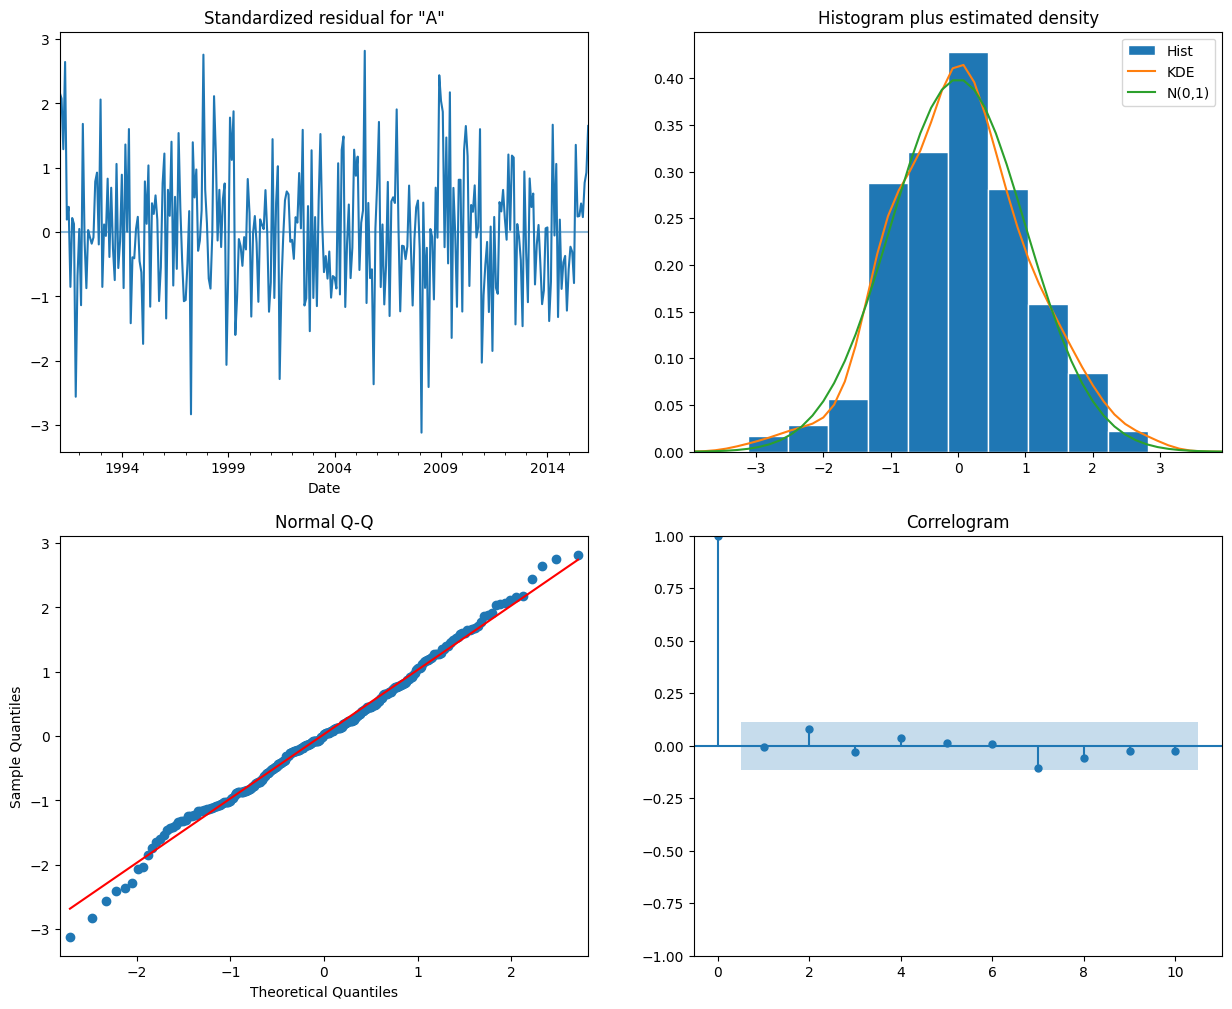

In [53]:
fitted_model.plot_diagnostics(figsize = (15, 12))
plt.show()

**As seen through the histogram and the Normal Q-Q, the residuals are normally distributed and the correlogram confirms that there's insignificant autocorrelation present in the residuals.**

# SARIMAX Forecasting:

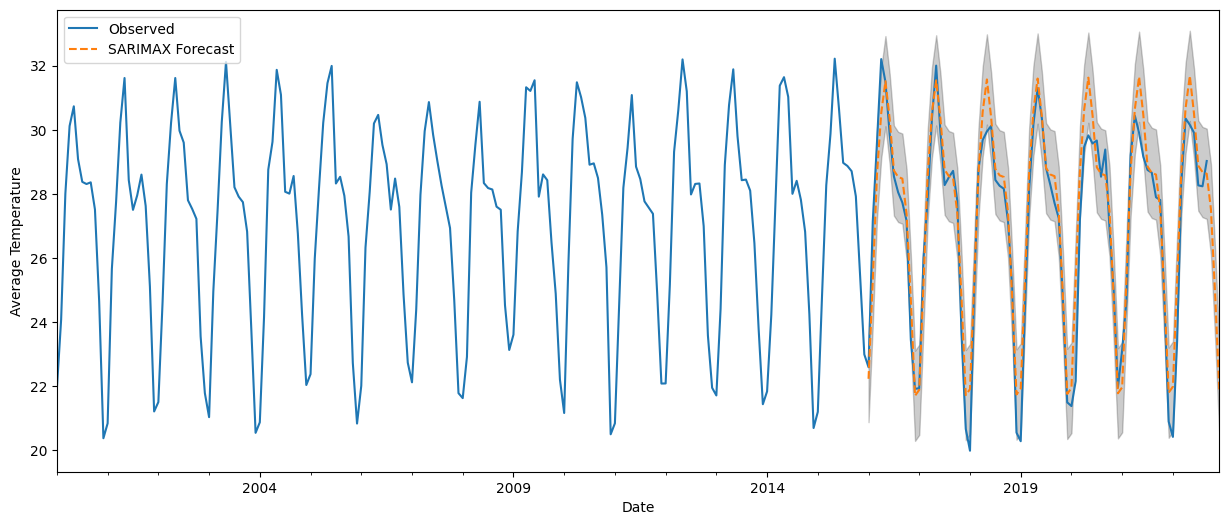

In [82]:

#Getting the SARIMAX forecast with number of steps as 48 since we want to make 4 year prediction and our data is monthly sampled.
pred = fitted_model.get_forecast(steps = 84)
#Plotting the observed and forecasted values:
ax1 = y['2000':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc = 'upper left')
plt.show()

**Zooming in on the forecast**

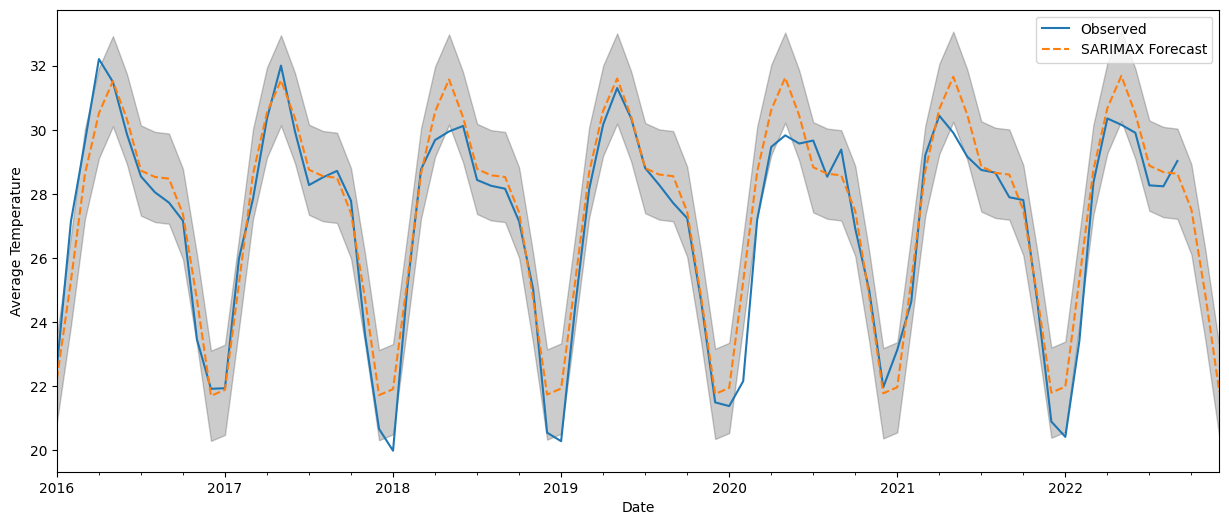

In [55]:
#Plotting the observed and forecasted values:
ax2 = y['2016':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax2, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax2.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Temperature')
plt.legend()
plt.show()

# Evaluating the SARIMAX Model:

In [56]:
y_forecasted_SARIMAX = pred.predicted_mean
y_truth = test
mse_SARIMAX = ((y_forecasted_SARIMAX - y_truth) ** 2).mean()
print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX, 2)))
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(np.sqrt(mse_SARIMAX), 2)))

The Mean Squared Error of SARIMAX forecast is 0.81
The Root Mean Squared Error of SARIMAX forecast is 0.9


**The RMSE tells us that the SARIMAX model was able to forecast the monthly average temperature within 0.9°C of the true temperature.**

# The Long Short Term Memory (LSTM) Model:

**Scaling the Data:**

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))

**Re-structuring the Time Series Data for LSTM usage:**


For the LSTM to use the time series data, we first need to split it into rolling windows of a specific size. We can do this easily using the TimeseriesGenerator function in the Keras library.

In [58]:
from keras.preprocessing.sequence import TimeseriesGenerator

window_size = 60  # This is the size of the sliding window

train_generator = TimeseriesGenerator(train_scaled, 
                                      train_scaled, 
                                      length=window_size, 
                                      batch_size=1)

In [59]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, input_shape=(window_size, 1), return_sequences=True),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(10),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

**Compiling the Model**

In [60]:
# Compile your model
model.compile(loss='mse', optimizer='adam')

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            30200     
                                                                 
 lstm_5 (LSTM)               (None, 10)                2440      
                                                                 
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 76257 (297.88 KB)
Trainable params: 7625

In [84]:

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(r"C:\TemperatureForecastingModel.h5", 
                             monitor = 'loss', save_best_only = True)

In [62]:
import random as rd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import logging
logging.getLogger('tensorflow').disabled = True

# Set random seeds
rd.seed(10)
np.random.seed(150)
tf.random.set_seed(150)

# Assuming 'checkpoint' is defined elsewhere
history = model.fit(train_generator, epochs=100, callbacks=[checkpoint])

Epoch 1/100
252/252 [==============================] - 35s 99ms/step - loss: 0.5157
Epoch 2/100


C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


252/252 [==============================] - 25s 99ms/step - loss: 0.1419
Epoch 3/100
252/252 [==============================] - 25s 101ms/step - loss: 0.1303
Epoch 4/100
252/252 [==============================] - 26s 103ms/step - loss: 0.1075
Epoch 5/100
252/252 [==============================] - 25s 98ms/step - loss: 0.0992
Epoch 6/100
252/252 [==============================] - 25s 100ms/step - loss: 0.1091
Epoch 7/100
252/252 [==============================] - 25s 101ms/step - loss: 0.0870
Epoch 8/100
252/252 [==============================] - 25s 97ms/step - loss: 0.0755
Epoch 9/100
252/252 [==============================] - 25s 99ms/step - loss: 0.0835
Epoch 10/100
252/252 [==============================] - 25s 100ms/step - loss: 0.0758
Epoch 11/100
252/252 [==============================] - 26s 101ms/step - loss: 0.0914
Epoch 12/100
252/252 [==============================] - 25s 99ms/step - loss: 0.0790
Epoch 13/100
252/252 [==============================] - 25s 98ms/step - loss: 0

**Plotting the training loss**

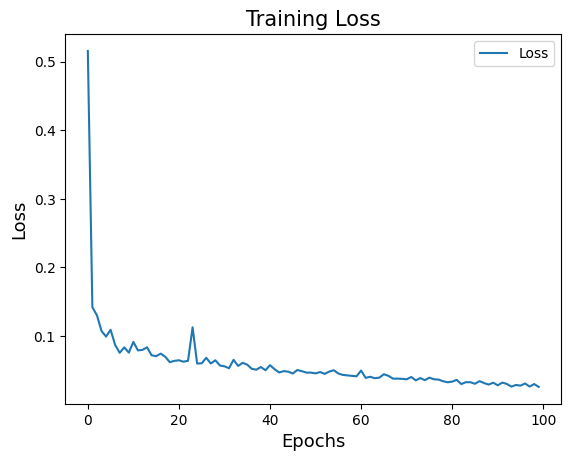

In [63]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs", fontsize = 13)
plt.ylabel("Loss", fontsize = 13)
plt.legend(["Loss"])
plt.title("Training Loss", fontsize = 15)
plt.show()

**Loading the Best Model:**

In [64]:
from tensorflow.keras.models import load_model
model = load_model(r"C:\TemperatureForecastingModel.h5")

**LSTM Forecasting:**

In [65]:
#Creating an empty forecasts list:
lstm_predictions_scaled = []

#Creating a batch of the latest data points based on the window size for forecast:
batch = train_scaled[-window_size:]
#Reshaping the batch as per model requirements:
current_batch = batch.reshape((1, window_size, 1))

#Iteratively making the forecast for each month of the next year:
for i in range(len(test)):
    #Forecasting the next month using previous 14 (window size) data points.
    lstm_pred = model.predict(current_batch)[0]
    #Appending the next month forecast to the forecasts list:
    lstm_predictions_scaled.append(lstm_pred) 
    #Appending the next month forecast to the current batch and 
    #removing the earliest data point in its place to preserve the window size:
    current_batch = np.append(current_batch[:, 1:, :], [[lstm_pred]], axis = 1)
    
#Since the original values were scaled before training the model, we need to 
#inverse scale the forecast in order to get the forecast for the original data. 
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

1/1 [==============================] - 0s 75ms/step


**Plotting the LSTM Forecast:**

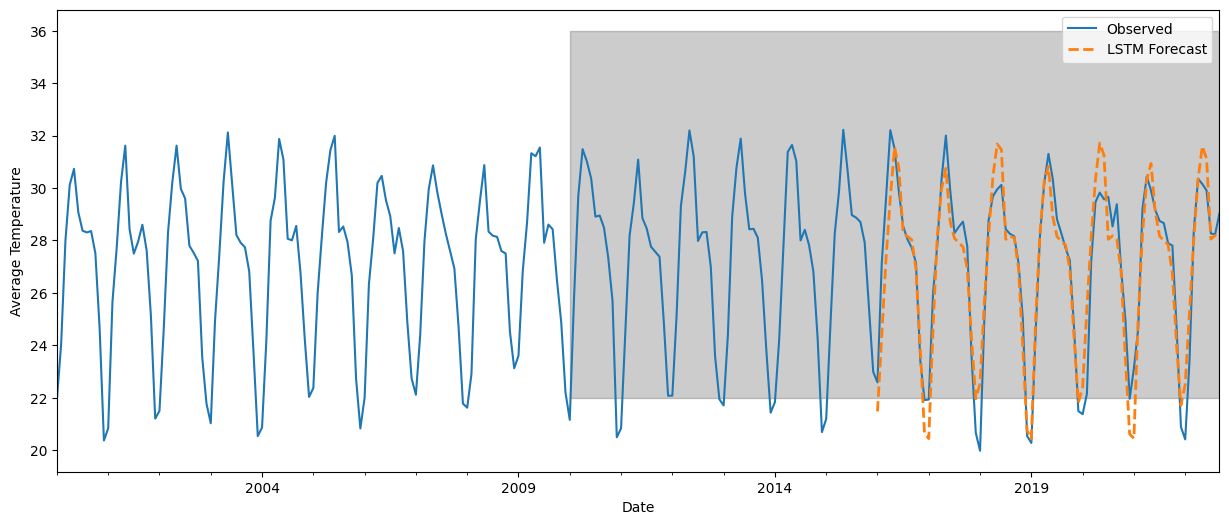

In [66]:
lstm_preds = pd.DataFrame(data = [lstm_predictions[i][0] for i in range(0, len(lstm_predictions))], columns = ['LSTM Forecast']).set_index(test.index)
ax3 = y['2000':].plot(label = 'Observed')
ax3.fill_between(y['2010':].index, [22 for i in y['2010':]], [36 for i in y['2010':]], color = 'k', alpha = 0.2)
lstm_preds.plot(ax = ax3, label = 'LSTM Forecast', figsize = (15, 6), linewidth = 2, linestyle = 'dashed')
ax3.set_xlabel('Date')
ax3.set_ylabel('Average Temperature')
plt.legend()
plt.show()

**Zoomin In on the Forecast:**

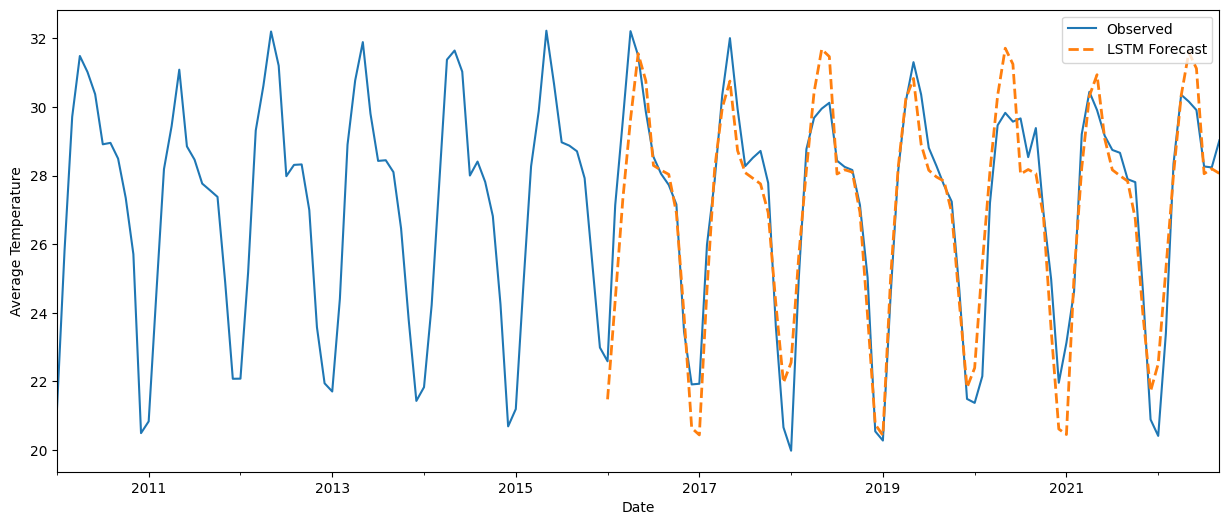

In [67]:
ax4 = y['2010':].plot(label = 'Observed')
lstm_preds.plot(ax = ax4, label = 'LSTM Forecast', figsize = (15, 6), linewidth = 2, linestyle = 'dashed')
ax4.set_xlabel('Date')
ax4.set_ylabel('Average Temperature')
plt.legend()
plt.show()


**Evaluating the LSTM Model:**

In [68]:
y_forecasted_LSTM = lstm_preds['LSTM Forecast']
y_truth = test
mse_LSTM = ((y_forecasted_LSTM - y_truth) ** 2).mean()
print('The Mean Squared Error of LSTM forecast is {}'.format(round(mse_LSTM, 2)))
print('The Root Mean Squared Error of LSTM forecast is {}'.format(round(np.sqrt(mse_LSTM), 2)))

The Mean Squared Error of LSTM forecast is 1.31
The Root Mean Squared Error of LSTM forecast is 1.14


**Comparing SARIMAX and LSTM Forecasts:**

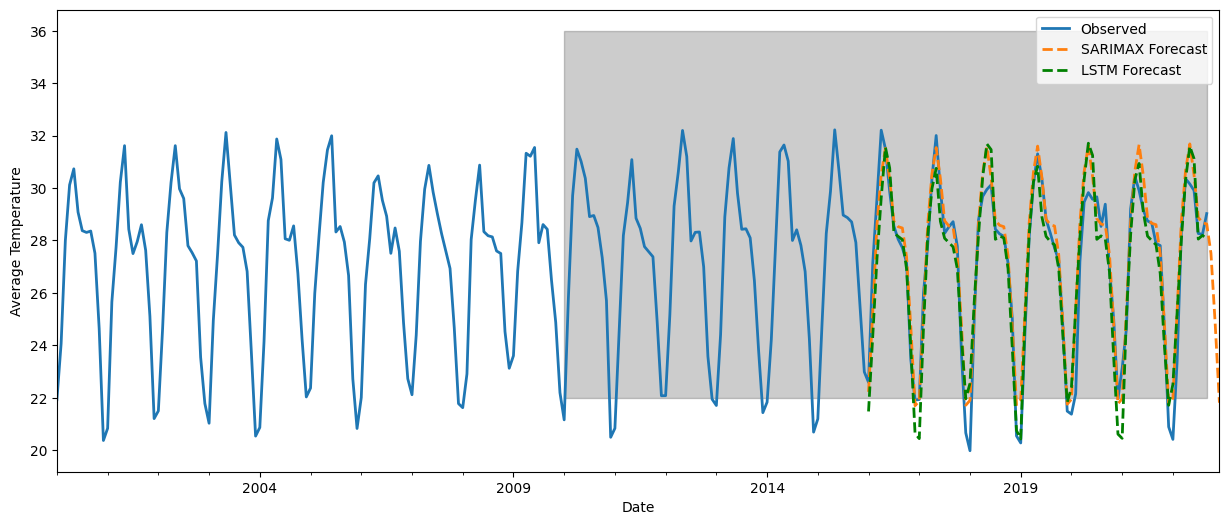

In [70]:
plt.figure(figsize = (15, 6))
ax5 = y['2000':].plot(label = 'Observed', linewidth = 2)
ax5.fill_between(y['2010':].index, [22 for i in y['2010':]], [36 for i in y['2010':]], color = 'k', alpha = 0.2)
pred.predicted_mean.plot(ax = ax5, label = 'SARIMAX Forecast', linewidth = 2, linestyle = 'dashed')
lstm_preds.plot(ax = ax5, label = 'LSTM Forecast', linewidth = 2, linestyle = 'dashed', color = 'green')
ax5.set_xlabel('Date')
ax5.set_ylabel('Average Temperature')
plt.legend()
plt.show()

**Zooming In on the Forecasts:**

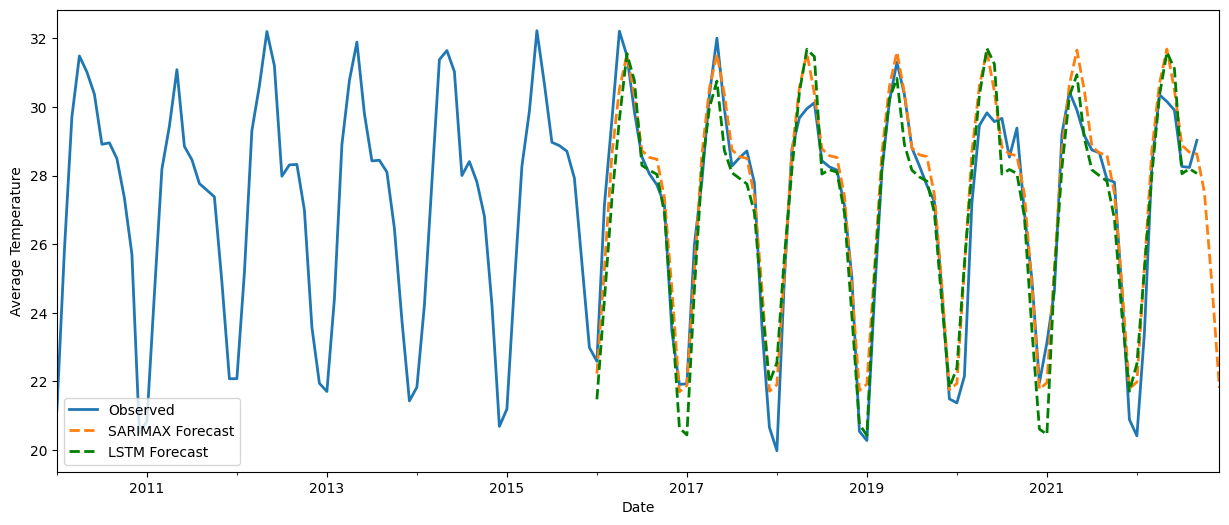

In [72]:
plt.figure(figsize = (15, 6))
ax6 = y['2010':].plot(label = 'Observed', linewidth = 2)
pred.predicted_mean.plot(ax = ax6, label = 'SARIMAX Forecast', linewidth = 2, linestyle = 'dashed')
lstm_preds.plot(ax = ax6, label = 'LSTM Forecast', linewidth = 2, linestyle = 'dashed', color = 'green')
ax6.set_xlabel('Date')
ax6.set_ylabel('Average Temperature')
plt.legend()
plt.show()

In [73]:
print("The SARIMAX Model had an RMSE value of {} whereas the LSTM model had an RMSE value of {}.".format(round(np.sqrt(mse_SARIMAX), 2), round(np.sqrt(mse_LSTM), 2)))

The SARIMAX Model had an RMSE value of 0.9 whereas the LSTM model had an RMSE value of 1.14.
